/home/dark/miniconda3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


144    439.854827
145    465.296536
146    500.666174
147    535.971762
148    561.689750
149    571.313590
150    562.973164
151    539.730057
152    508.528781
153    478.147639
Name: predicted_mean, dtype: float64


<Axes: >

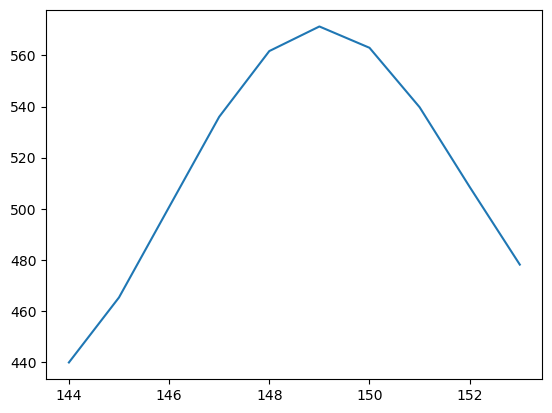

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load a sample dataset. We'll use the "AirPassengers" dataset.
df = pd.read_csv('AirPassengers.csv')

# We'll use the "Passengers" column to train our ARIMA model.
# For this example, we'll use an ARIMA(2, 1, 2) model.
model = ARIMA(df['#Passengers'], order=(2,1,2))

# Fit the model
model = model.fit()

# Make a prediction
prediction = model.forecast(steps=10)

print(prediction)

#plot the prediction
prediction.plot()

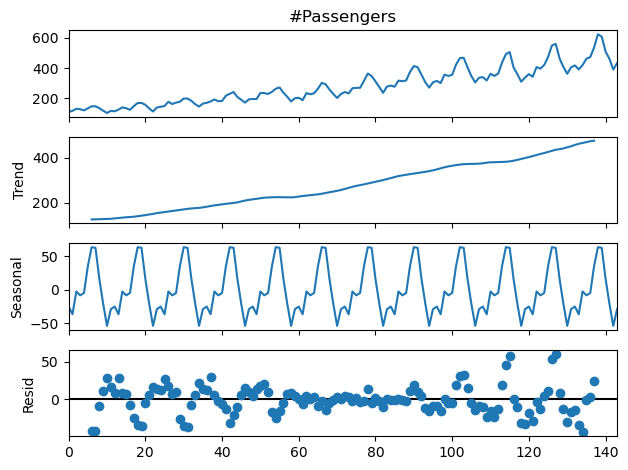

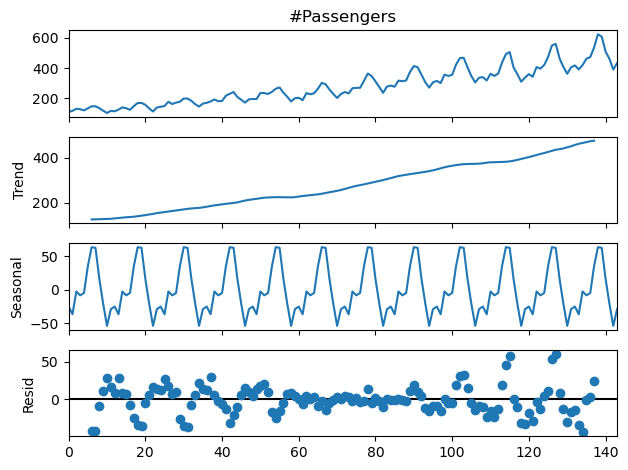

In [4]:
# decompose the time series into trend, seasonal and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['#Passengers'], model='additive', period=12)
decomposition.plot()

In [5]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['#Passengers'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(" Is data Stationary ? ", result[1] < 0.05)

ADF Statistic: 0.815369
p-value: 0.991880
 Is data Stationary ?  False


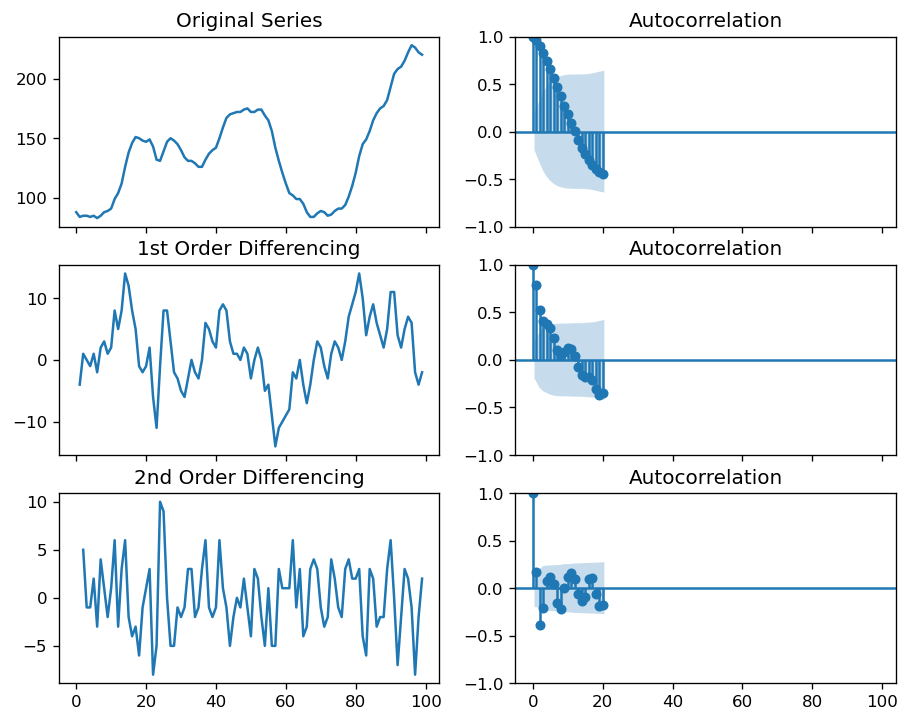

In [6]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
